In [1]:
##positive/negative SENTIMENT based on reading and look further into reviews with negative sentiments
##to make changes?

In [2]:
#basic imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [4]:
#Required text pre-processing libraries are imported
import string
import nltk
import re

# download the stopwords and wordnet corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
# import tokenize from nltk library
from nltk import tokenize
# import WordNetLemmatizer from nltk library
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer

#Required data visualisation libraries are imported
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jillian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jillian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jillian/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
#reading in data

In [6]:
df = pd.read_csv('../data/Womens Clothing E-Commerce Reviews 2.csv')

In [7]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [9]:
df['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
        ... 
792        1
776        1
744        1
728        1
0          1
Name: Clothing ID, Length: 1206, dtype: int64

In [10]:
#1206 unique clothing items, 1 clothing item with ID of "0" may be deleted due to assuming this is not an actual product ID

In [11]:
df[df['Clothing ID'] == 0]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
14746,14746,0,26,NaN,NaN,5,1,0,General,Jackets,Outerwear


In [12]:
#will be removed when items without review text are removed

In [13]:
df.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [14]:
#many nas in title; will explore further

In [15]:
df[df.Title.isna()==True]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
11,11,1095,39,NaN,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses
30,30,1060,33,NaN,Beautifully made pants and on trend with the f...,5,1,0,General Petite,Bottoms,Pants
36,36,1002,29,NaN,This is a comfortable skirt that can span seas...,4,1,5,General,Bottoms,Skirts
...,...,...,...,...,...,...,...,...,...,...,...
23450,23450,964,40,NaN,I wanted to love this jacket. so soft and grea...,3,0,4,General,Jackets,Jackets
23453,23453,1104,39,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea...",4,1,0,General Petite,Dresses,Dresses
23458,23458,862,63,NaN,This is my new favorite sweater. it is lightwe...,5,1,0,General Petite,Tops,Knits
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [16]:
#rows with missing titles that still have Review Text will be usable; those missing Review Text will be deleted

In [17]:
df[df['Review Text'].isna()==True]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...,...
23258,23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [18]:
845/23486

0.035978881035510515

In [19]:
#deleting rows without review text, losing about 4% of data

In [20]:
df = df[df['Review Text'].isna()==False]

In [21]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [22]:
df.drop(columns='Unnamed: 0', inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [23]:
#dropping the additional index row

In [24]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [25]:
df[df['Division Name'].isna()==True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN
21532,665,43,So worth it!,Got these on sale...absolutely love eberjey! f...,5,1,0,NaN,NaN,NaN


In [26]:
#14 rows missing Division Name, Department Name, and Class Name are all the same items; they still contain review text, rating, and Recommended IND so I will keep these rows

In [27]:
df.duplicated().value_counts()

False    22640
True         1
dtype: int64

In [28]:
#it looks like there is one duplicate entry; locating that entry

In [29]:
df[df.duplicated() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


In [30]:
df[(df['Clothing ID'] == 1022) & (df.Age == 37)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1400,1022,37,Love these jeans!,"Great fit, perfect length! so happy with these...",5,1,3,General,Bottoms,Jeans
9447,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans
9722,1022,37,Classic ag greatness,These are awesome! classic style and quality y...,5,1,0,General,Bottoms,Jeans
11429,1022,37,Unique style,"These are nice cords, albeit they look slightl...",4,1,1,General,Bottoms,Jeans
21888,1022,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans


In [31]:
#index 9447 and 21888 appear to be duplicates; will keep the first review and delete index 21888

In [32]:
df.drop(21888, inplace=True)

/Users/jillian/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [34]:
#our df has one less row, drop was successful

In [35]:
df.Age.describe()

count    22640.000000
mean        43.280654
std         12.327181
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

In [36]:
df.Rating.describe()

count    22640.000000
mean         4.183525
std          1.115774
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [37]:
df.Rating.value_counts()

5    12539
4     4908
3     2823
2     1549
1      821
Name: Rating, dtype: int64

In [38]:
df['Recommended IND'].value_counts()

1    18539
0     4101
Name: Recommended IND, dtype: int64

In [39]:
#large skew in our data; most of our data is recommended and a high % of our data received a rating of "5"

In [40]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.io import to_image
init_notebook_mode(connected=True)

data = df['Rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Reviews'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

 # Do this first so we don't create a file if image conversion fails
img_data = to_image(fig,
        format='png',
        width=800,
        height=500,
        scale=5)

#fig.write_image("images/reviews_distribution.png", scale=5)

In [41]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [42]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


<ipython-input-41-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-41-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

<ipython-input-41-c4d51ae7f98d>:9: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



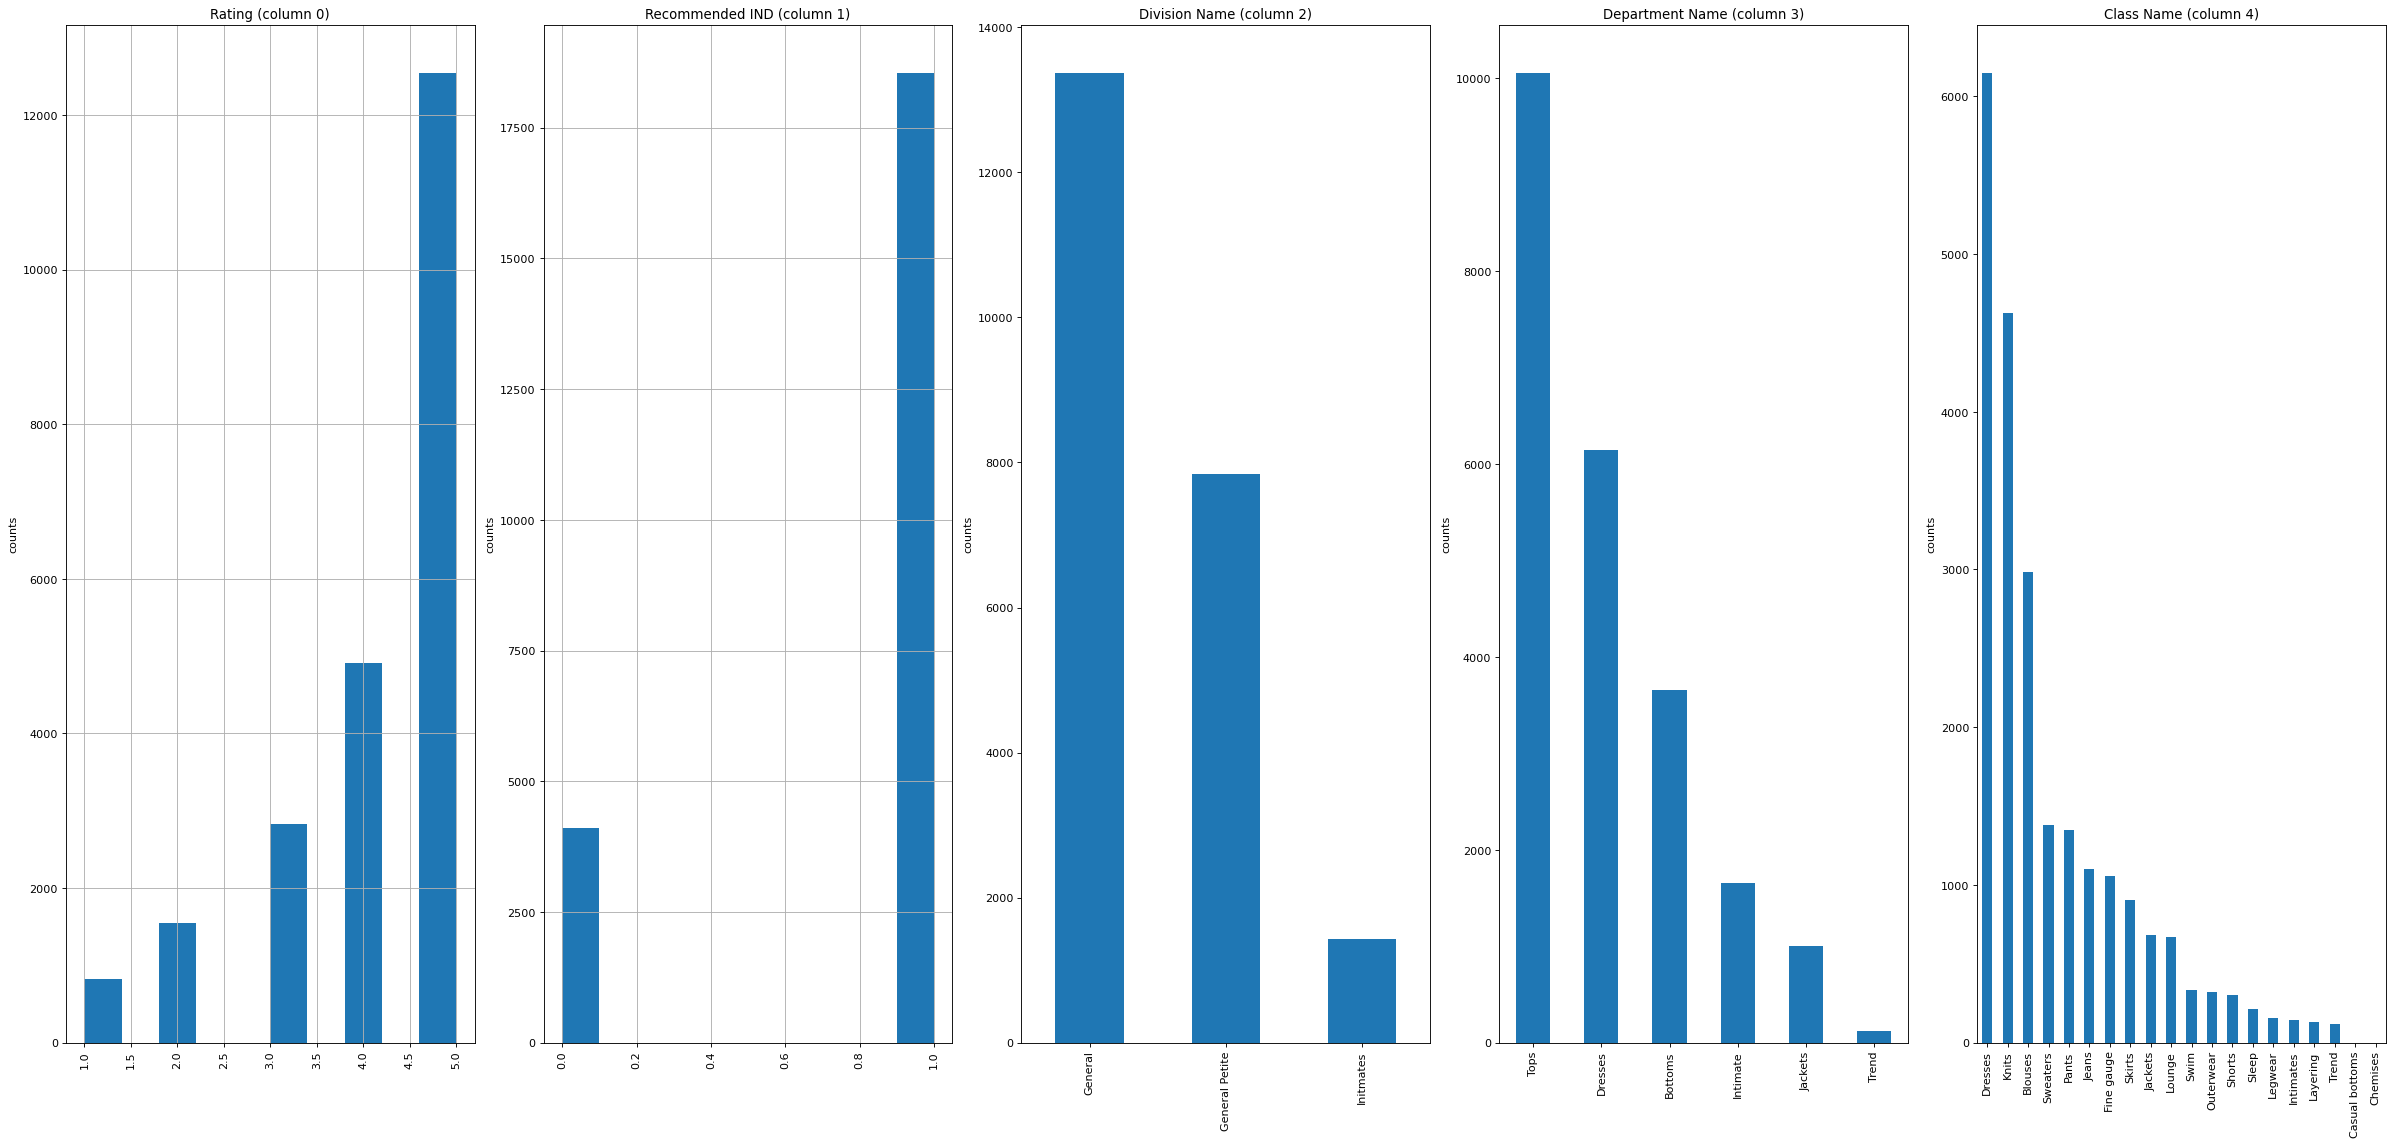

In [43]:
plotPerColumnDistribution(df, 10, 5)

In [44]:
#unsure why Positive Feedback Count is not showing above; plotted below

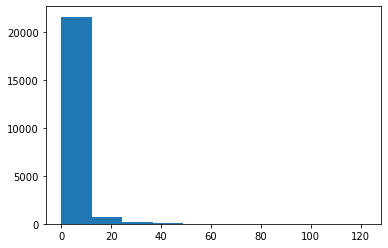

In [45]:
plt.hist(df['Positive Feedback Count']);

In [46]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

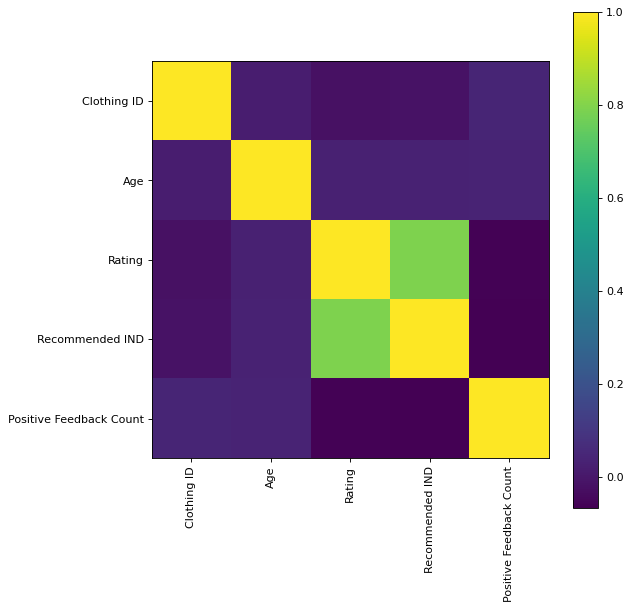

In [47]:
plotCorrelationMatrix(df, 8);

In [48]:
#looking for potential correlation between age and rating
#expecting high correlation between rating and recommended

In [49]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

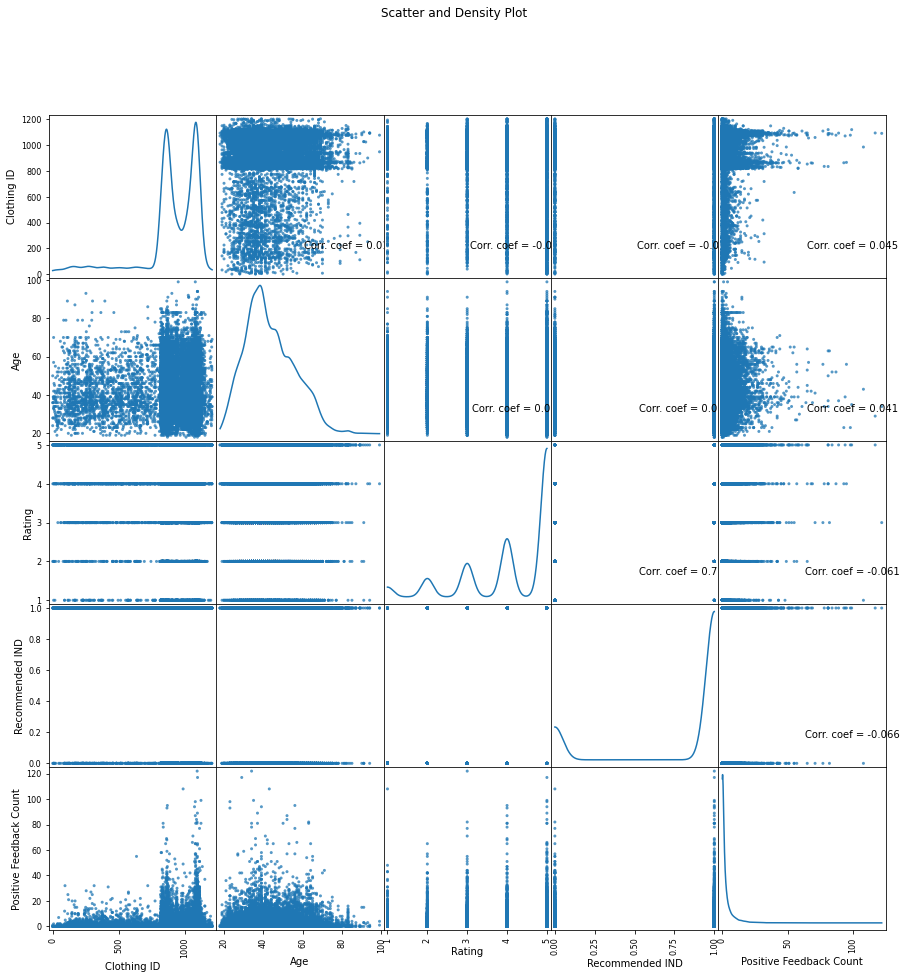

In [50]:
plotScatterMatrix(df, 15, 10)

In [51]:
#Changing variables headers to remove spaces for modelling
df = df.rename(columns={'Clothing ID' : 'Clothing_ID', 'Review Text': 'Review_Text', 'Recommended IND': 'Recommended_IND', 'Positive Feedback Count':'Positive_Feedback_Count', 'Division Name': 'Division_Name', 'Class Name': 'Class_Name'})

In [52]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [53]:
#addressed our duplicate values and nans, ready to complete text preprocessing

## Text Preprocessing

In [54]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [55]:
df['Clean'] = df.Review_Text.astype(str)


In [56]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...


In [57]:
# Need to remove capitalization, apostrophes, and numbers from the reviews

# Create a tokenizer that will take all words with three or more letters
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
tokenizer = RegexpTokenizer(pattern)

# Create list of stopwords in English (language of the reviews)
# Remove "very" from the list of stopwords 
stopwords_list = stopwords.words("english")
# Remove "very" from the list of stopwords 
stopwords_list.remove("very")

# Create an instance of nltk's WordNetLemmatizer with the variable name `lemmatizer`
lemmatizer = WordNetLemmatizer()

In [58]:
def preprocess_text(text, tokenizer, stopwords_list, lemmatizer):
    # Standardize case (lowercase the text)
    lowered_text = text.lower()
    
    # Tokenize text using `tokenizer`
    tokens = tokenizer.tokenize(lowered_text)
    
    # Remove stopwords using `stopwords_list` and removing punctuation and strings with non-alphabetic properties 
    stopped_tokens = [word for word in tokens if word not in stopwords_list and word not in string.punctuation and word.isalpha()]
    
    # Stem the tokenized text using `stemmer`
    lemmatized_text = [lemmatizer.lemmatize(token) for token in stopped_tokens]
    
    # Return the preprocessed text
    return lemmatized_text

In [59]:
# Apply the preprocess function to the entire dataset
df['Clean'] = df['Clean'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, lemmatizer))


In [60]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hope, dress, really, wanted, work, init..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, very, flattering, due, adjustable, fro..."


In [61]:
# create new column from df_clean that converts list of tokens to a string.
df['String']=df.Clean.str.join(" ")

In [62]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hope, dress, really, wanted, work, init...",high hope dress really wanted work initially o...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, very, flattering, due, adjustable, fro...",shirt very flattering due adjustable front tie...


In [63]:
#creating new Target class called "Positive_Rating"; this will break up reviews into positive
#or negative sentiment, based on their rating
#for the purposes of this, a rating of 4-5 will be positive (1) and a rating of 1-3 will be
#negative/neutral (2)

In [64]:
def target_label(row):
    if row['Rating'] == 4:
      return 1
    elif row['Rating'] == 5:
        return 1
    else:
        return 0


In [65]:
df['Positive_Rating'] = df.apply(lambda row: target_label(row), axis=1)

In [66]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"[love, dress, sooo, pretty, happened, find, st...",love dress sooo pretty happened find store gla...,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hope, dress, really, wanted, work, init...",high hope dress really wanted work initially o...,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, very, flattering, due, adjustable, fro...",shirt very flattering due adjustable front tie...,1


In [67]:
df.Positive_Rating.value_counts()

1    17447
0     5193
Name: Positive_Rating, dtype: int64

In [68]:
17447/(17447+5193)

0.7706272084805653

In [69]:
#77 % of ratings are categorized as positive sentiment

In [70]:
df.Recommended_IND.value_counts()

1    18539
0     4101
Name: Recommended_IND, dtype: int64

In [71]:
#interesting difference that there are people who have rated 3 or below but recommended item

In [72]:
df[df.Positive_Rating != df.Recommended_IND]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
14,1077,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses,"[nice, choice, holiday, gathering, like, lengt...",nice choice holiday gathering like length graz...,0
16,1065,34,"You need to be at least average height, or taller",Material and color is nice. the leg opening i...,3,1,2,General,Bottoms,Pants,"[material, color, nice, leg, opening, very, la...",material color nice leg opening very large len...,0
23,1077,34,"Like it, but don't love it.",Cute little dress fits tts. it is a little hig...,3,1,0,General,Dresses,Dresses,"[cute, little, dress, fit, tt, little, high, w...",cute little dress fit tt little high waisted g...,0
52,1104,39,NaN,"Love the color and style, but material snags e...",3,1,3,General,Dresses,Dresses,"[love, color, style, material, snag, easily]",love color style material snag easily,0
84,861,37,Casual & unique tee,I received this shirt in my typical xs and it ...,3,1,0,General Petite,Tops,Knits,"[received, shirt, typical, x, fit, perfectly, ...",received shirt typical x fit perfectly crazy l...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23452,999,38,Full skirt,I ordered this skirt hoping i could wear it to...,3,1,1,General,Bottoms,Skirts,"[ordered, skirt, hoping, could, wear, work, lo...",ordered skirt hoping could wear work looked ta...,0
23462,999,24,Its okay,The pattern of this skirt is adorable and look...,3,1,0,General,Bottoms,Skirts,"[pattern, skirt, adorable, look, better, perso...",pattern skirt adorable look better person fabr...,0
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,"[cute, dress, waist, high, sleeve, tight, mayb...",cute dress waist high sleeve tight maybe diffe...,0
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[reminds, maternity, clothes, soft, stretchy, ...",reminds maternity clothes soft stretchy shiny ...,0


In [73]:
df.Rating[df.Positive_Rating != df.Recommended_IND].value_counts()

3    1170
4     164
2      94
5      23
1      15
Name: Rating, dtype: int64

In [74]:
#looking at the imbalance between sentiments and recommended based on rating

In [75]:
pd.set_option('display.max_colwidth', None)

In [76]:
df[df.Positive_Rating != df.Recommended_IND][df.Rating == 1]

<ipython-input-76-50e906cedd49>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
2427,939,39,NaN,Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.,1,1,0,General,Tops,Sweaters,"[beautiful, jacket, got, lot, compliment, true, size, thick, very, warm]",beautiful jacket got lot compliment true size thick very warm,0
2872,829,51,NaN,"Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased the denim print.",1,1,1,General Petite,Tops,Blouses,"[very, cute, top, went, size, little, large, back, taste, purchased, denim, print]",very cute top went size little large back taste purchased denim print,0
5570,861,69,Great t,"I love this t-shirt because it has the combination of elegance and relazation to a ""t"".\r\nit's soft, pretty and covers my wide bottom well.",1,1,0,General,Tops,Knits,"[love, shirt, combination, elegance, relazation, soft, pretty, cover, wide, bottom, well]",love shirt combination elegance relazation soft pretty cover wide bottom well,0
6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it falls. great quality material.,1,1,0,General,Tops,Blouses,"[love, movement, blouse, fall, great, quality, material]",love movement blouse fall great quality material,0
7740,872,44,Odd neckline,"I loved the color and design until i tried it on in the store. i am 5'5"" with a slender build. i tried my usual xs but couldn't manage to put this shirt on me without risking smear my makeup or scratch my face by the elastic band at the neckline. the band is so small even fully stretched out. i have a normal sized head just in case you wonder... i gave up after wrestling with it. i can only imagine how uncomfortable to wear something with a tight elastic band choking me...funny... but not funny.",1,1,0,General,Tops,Knits,"[loved, color, design, tried, store, slender, build, tried, usual, x, manage, put, shirt, without, risking, smear, makeup, scratch, face, elastic, band, neckline, band, small, even, fully, stretched, normal, sized, head, case, wonder, gave, wrestling, imagine, uncomfortable, wear, something, tight, elastic, band, choking, funny, funny]",loved color design tried store slender build tried usual x manage put shirt without risking smear makeup scratch face elastic band neckline band small even fully stretched normal sized head case wonder gave wrestling imagine uncomfortable wear something tight elastic band choking funny funny,0
7850,956,43,NaN,"This is so close to perfect, but there's a seam down the middle of the back and they didn't bother to match the polka dots. you can see the mismatch in the second photo. i was about to buy the jacket, and totally in love, when i turned and saw the error. i hoped it was one bad match, but nope, on every one. couldn't unsee, didn't buy. very disappointed.",1,1,1,General Petite,Jackets,Jackets,"[close, perfect, seam, middle, back, bother, match, polka, dot, see, mismatch, second, photo, buy, jacket, totally, love, turned, saw, error, hoped, one, bad, match, nope, every, one, unsee, buy, very, disappointed]",close perfect seam middle back bother match polka dot see mismatch second photo buy jacket totally love turned saw error hoped one bad match nope every one unsee buy very disappointed,0
9877,1084,58,NaN,"I loved the dress, but just not dressy enough after rethinking what i needed. very easy order and return. thanks!",1,1,5,General Petite,Dresses,Dresses,"[loved, dress, dressy, enough, rethinking, needed, very, easy, order, return, thanks]",loved dress dressy enough rethinking needed very easy order return thanks,0
10517,1110,44,Beautiful dress; so excited to wear it!!!,"I saw this dress in the catalog and had to have it. when i went to the store it was sold out so i had them order and ship it to me in two sizes - my regular and one size larger. when i got them, i tried o

In [77]:
##some revieweres rated 1, but their sentiments do not seem to match the 1 rating; this is an example of how NLP
#can be VERY helpful because ratings are not always accurate
#unfortunately this is also a limitation to our model because this effects what words are associated with
#positive/negative sentiments

In [78]:
##seeing if there are repeat words in set

In [79]:
# Helper function to visualize the 10 most common words in each class.

def visualize_top_10(freq_dist, title):
    
    plt.rcParams.update({'font.size': 13})
    
    # Extract data for plotting
    top_10 = list(zip(*freq_dist.most_common(10)))
    tokens = top_10[0]
    counts = top_10[1]

    # Set up plot and plot data
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(tokens, counts)

    # Customize plot appearance
    ax.set_title(title)
    ax.set_ylabel("Count")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.tick_params(axis="x", rotation=90)
    plt.tight_layout()
    
    # Save png of image to images folder using title as filename
    #plt.savefig(f'./images/{title}', facecolor='white', dpi=500)


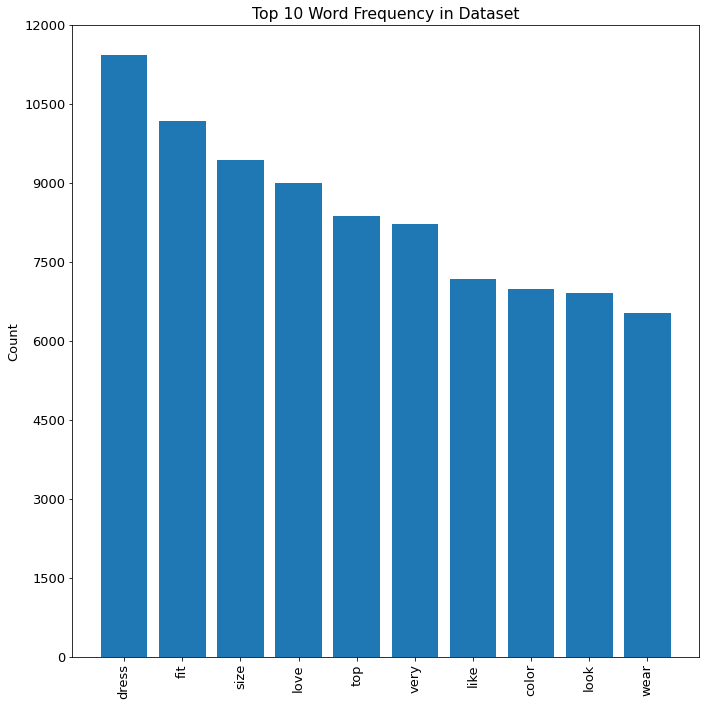

In [80]:
# Ten Most common words in the full dataset
sample_freq_dist = FreqDist(df.Clean.explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency in Dataset")

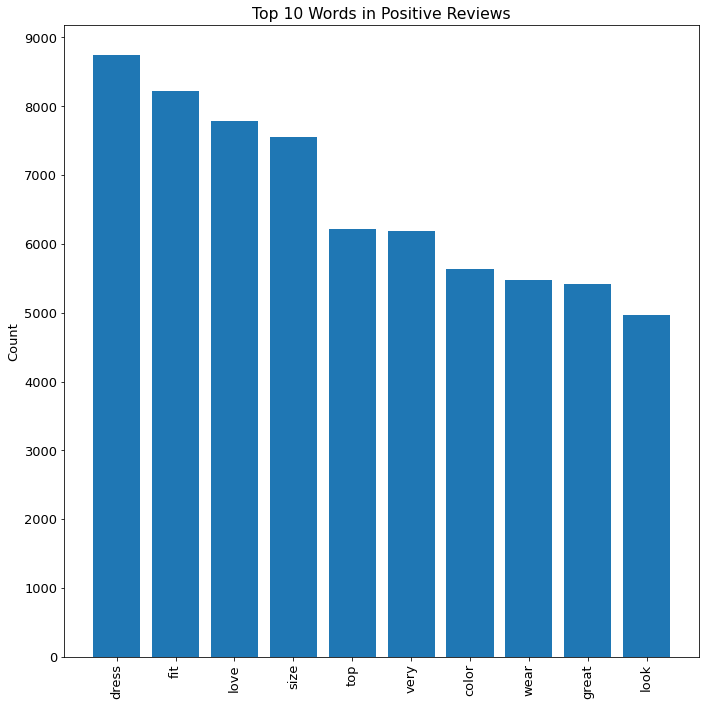

In [81]:
# Ten most common words appearing in positive reviews
pos_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 1].explode())
visualize_top_10(pos_freq_dist, 'Top 10 Words in Positive Reviews')

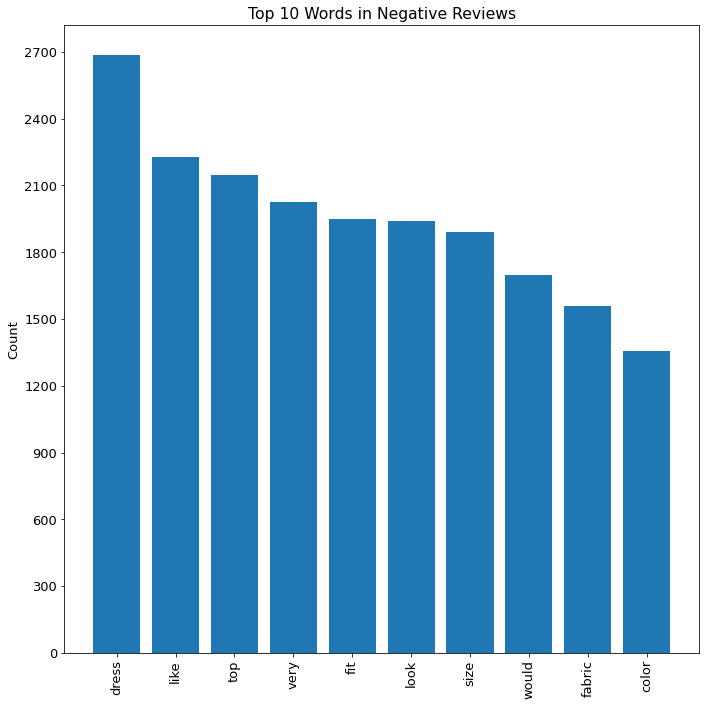

In [82]:
# Ten most common words appearing in negative reviews
neg_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 0].explode())
visualize_top_10(neg_freq_dist, 'Top 10 Words in Negative Reviews')

In [83]:
#overalp inclues, 'dress', 'fit', 'top', 'size', 'very', and 'look'

In [84]:
customsw = ['dress', 'fit', 'top', 'size', 'very', 'look']   
stopwords_list.extend(customsw)

In [85]:
# Helper function to remove stopwords
def remove_stopwords(token_list):
    """
    Given a list of tokens, return a list where the tokens
    that are also present in sw have been removed
    """
    stopwords_r = [token for token in token_list if token not in stopwords_list]
    return stopwords_r

In [86]:
# Apply the removal function to df.clean to remove new stop words
df['Clean'] = df['Clean'].apply(remove_stopwords)

# overwriting 'string' column to also remove new stopwords
df['String'] = df.Clean.str.join(" ")

In [87]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,"[love, sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, love, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]",love sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,"[high, hope, really, wanted, work, initially, ordered, petite, small, usual, found, outrageously, small, small, fact, could, zip, reordered, petite, medium, ok, overall, half, comfortable, nicely, bottom, half, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",high hope really wanted work initially ordered petite small usual found outrageously small small fact could zip reordered petite medium ok overall half comfortable nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,"[love, love, love, jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]",love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, love, shirt]",shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,1


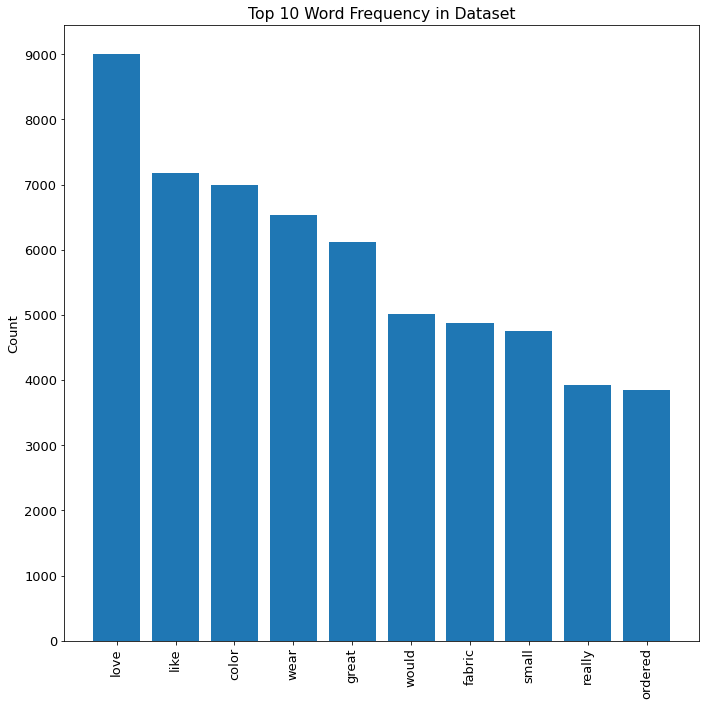

In [88]:
# Ten Most common words in the full dataset
sample_freq_dist = FreqDist(df.Clean.explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency in Dataset")

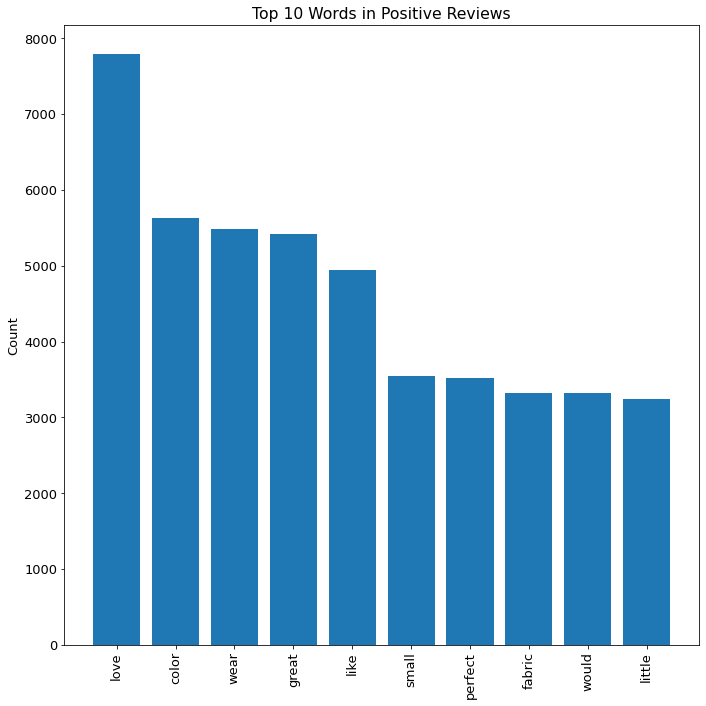

In [89]:
# Ten most common words appearing in positive reviews
pos_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 1].explode())
visualize_top_10(pos_freq_dist, 'Top 10 Words in Positive Reviews')

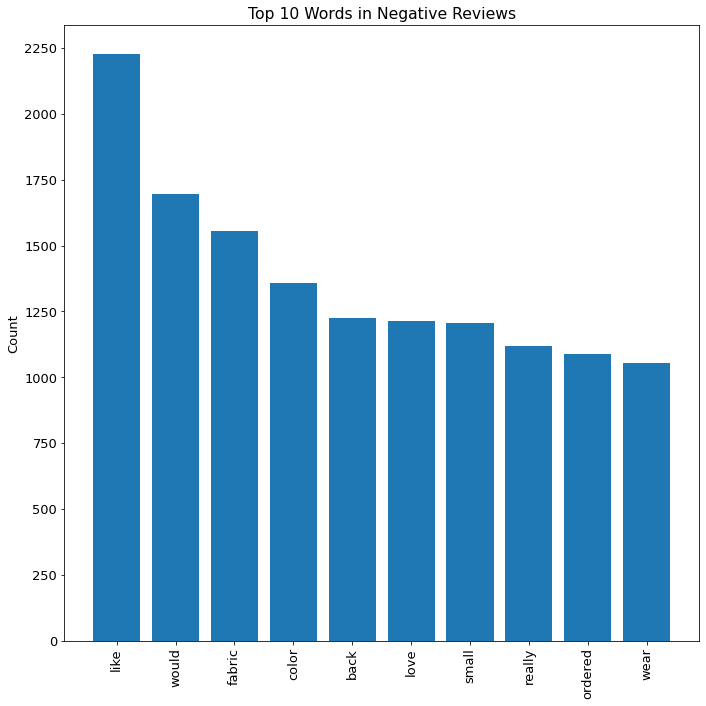

In [90]:
# Ten most common words appearing in negative reviews
neg_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 0].explode())
visualize_top_10(neg_freq_dist, 'Top 10 Words in Negative Reviews')

In [91]:
#identifying additiona overlap: 'like', 'color', 'love', 'small'

In [92]:
#also adding to stop words list

In [93]:
customsw = ['dress', 'fit', 'top', 'size', 'very', 'look', 'like', 'color', 'love', 'small']   
stopwords_list.extend(customsw)

In [94]:
# Apply the removal function to df.clean to remove new stop words
df['Clean'] = df['Clean'].apply(remove_stopwords)

# overwriting 'string' column to also remove new stopwords
df['String'] = df["Clean"].str.join(" ")

In [95]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,"[sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]",sooo pretty happened find store glad bc never would ordered online bc petite bought petite length hit little knee would definitely true midi someone truly petite,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,"[high, hope, really, wanted, work, initially, ordered, petite, usual, found, outrageously, fact, could, zip, reordered, petite, medium, ok, overall, half, comfortable, nicely, bottom, half, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",high hope really wanted work initially ordered petite usual found outrageously fact could zip reordered petite medium ok overall half comfortable nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,"[jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]",jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, shirt]",shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan shirt,1


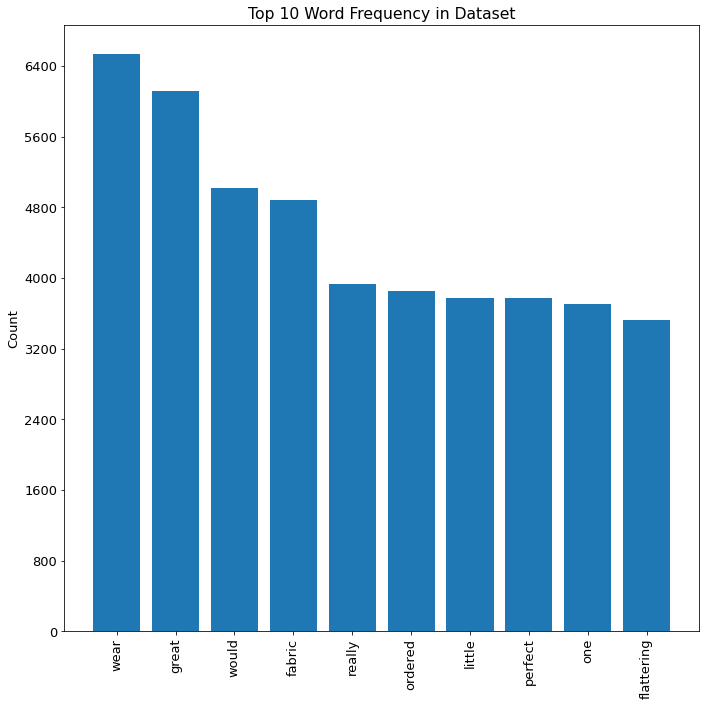

In [96]:
# Ten Most common words in the full dataset
sample_freq_dist = FreqDist(df.Clean.explode())
visualize_top_10(sample_freq_dist, "Top 10 Word Frequency in Dataset")

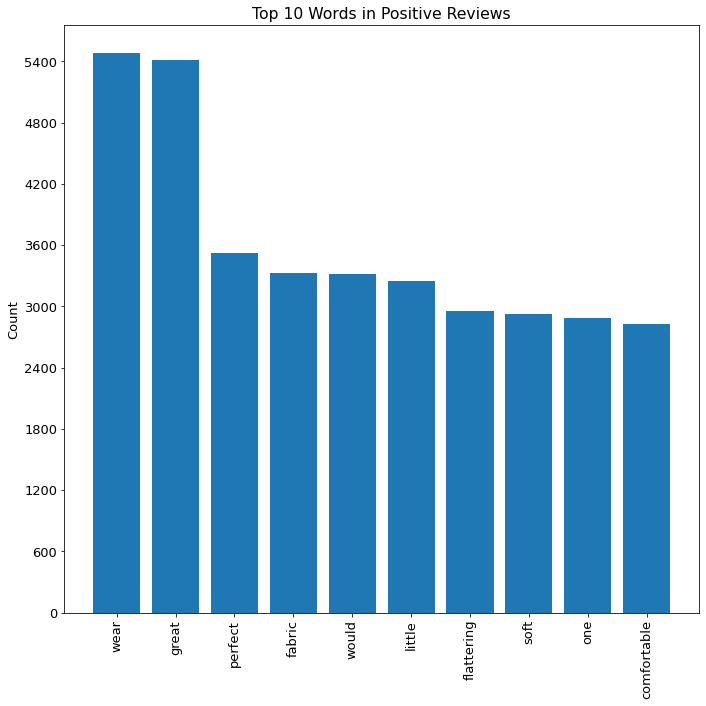

In [97]:
# Ten most common words appearing in positive reviews
pos_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 1].explode())
visualize_top_10(pos_freq_dist, 'Top 10 Words in Positive Reviews')

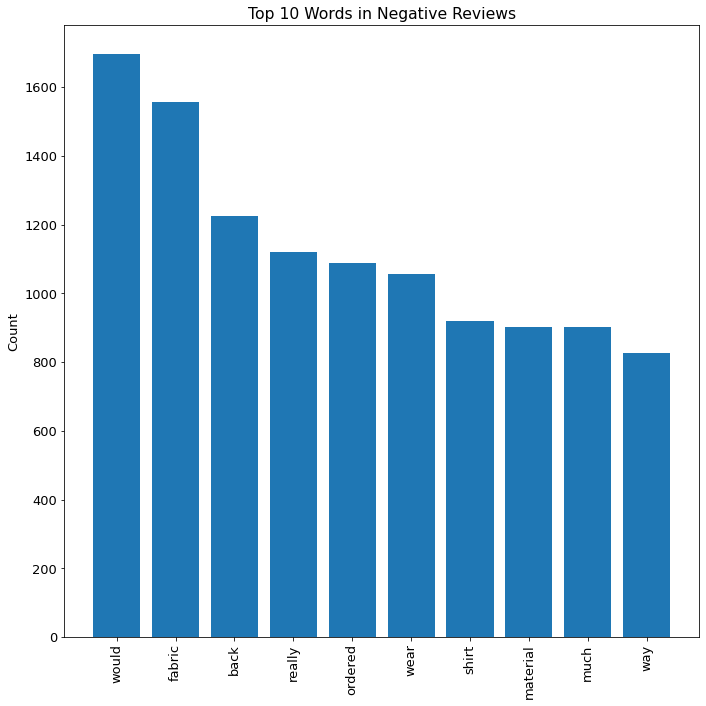

In [98]:
# Ten most common words appearing in negative reviews
neg_freq_dist = FreqDist(df['Clean'].loc[df['Positive_Rating'] == 0].explode())
visualize_top_10(neg_freq_dist, 'Top 10 Words in Negative Reviews')

In [99]:
#although fabric and wear are overlaps, they are in much different orders so I will keep them and not add any additional stopwords

### Final List of Stop Words Removed

The following is the final list of custom sw that were removed in addition to the standard stop words:

['dress', 'fit', 'top', 'size', 'very', 'look', 'like', 'color', 'love', 'small']   

# Exploring Bigrams

## Bigrams using CountVectorizer

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = c_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [101]:
df_ngram

,frequency,bigram
0,694,usually wear
1,607,well made
2,562,run large
3,367,many compliment
4,365,highly recommend
...,...,...
1995,22,available store
1996,22,appears picture
1997,22,also worn
1998,22,also felt


In [102]:
df_ngram['polarity'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram'].apply(lambda x: TextBlob(x).subjectivity)

In [103]:
df_ngram

,frequency,bigram,polarity,subjective
0,694,usually wear,-0.250000,0.250000
1,607,well made,0.000000,0.000000
2,562,run large,0.214286,0.428571
3,367,many compliment,0.500000,0.500000
4,365,highly recommend,0.160000,0.540000
...,...,...,...,...
1995,22,available store,0.400000,0.400000
1996,22,appears picture,0.000000,0.000000
1997,22,also worn,0.000000,0.000000
1998,22,also felt,0.000000,0.000000


## Bigrams using TfdifVectorizer

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
t_vec = TfidfVectorizer(ngram_range=(2,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})


In [105]:
df_ngram_tvec

,frequency,bigram
0,222.396075,well made
1,201.797502,usually wear
2,191.665957,run large
3,144.714739,super cute
4,139.042802,highly recommend
...,...,...
1995,9.318779,loose enough
1996,9.126534,store bought
1997,9.044608,length little
1998,8.869523,store petite


## Ngram Range of (1,2)

In [106]:
t_vec = TfidfVectorizer(ngram_range=(1,2), max_features=2000)
# matrix of ngrams
ngrams = t_vec.fit_transform(df['String'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = t_vec.vocabulary_
df_ngram_tvec = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'ngram'})

In [107]:
df_ngram_tvec[:50]

,frequency,ngram
0,684.641140,great
1,628.208679,wear
2,521.677483,fabric
3,507.977132,would
4,471.141099,perfect
5,452.809618,really
6,448.155680,flattering
7,442.120837,little
8,438.024966,shirt
9,437.478602,ordered


In [108]:
df_ngram_tvec['polarity'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).polarity)
df_ngram_tvec['subjective'] = df_ngram_tvec['ngram'].apply(lambda x: TextBlob(x).subjectivity)

In [109]:
df_ngram_tvec.sort_values('polarity')[:25]

,frequency,ngram,polarity,subjective
1019,23.382564,terrible,-1.00,1.000000
1612,15.066257,boring,-1.00,1.000000
997,23.937443,awful,-1.00,1.000000
1805,13.296595,horrible,-1.00,1.000000
1042,22.843950,hate,-0.80,0.900000
214,112.679541,disappointed,-0.75,0.750000
319,77.425731,bad,-0.70,0.666667
1771,13.566218,badly,-0.70,0.666667
1625,14.969933,cold water,-0.60,1.000000
1214,19.577433,disappointment,-0.60,0.400000


In [110]:
df_ngram_tvec.sort_values('polarity')[-25:]

,frequency,ngram,polarity,subjective
1795,13.365147,perfect weight,1.0,1.0
1802,13.312991,lb perfect,1.0,1.0
70,225.076493,perfectly,1.0,1.0
554,44.696975,perfect length,1.0,1.0
630,38.852585,perfect summer,1.0,1.0
966,24.878723,wonderfully,1.0,1.0
666,37.398731,excellent,1.0,1.0
977,24.475401,would perfect,1.0,1.0
1822,13.146340,one perfect,1.0,1.0
4,471.141099,perfect,1.0,1.0


## Saving Dataset

In [111]:
#saving dataset as single_word_data.csv to load into modeling notebook

In [112]:
df

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,"[absolutely, wonderful, silky, sexy, comfortable]",absolutely wonderful silky sexy comfortable,1
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,"[sooo, pretty, happened, find, store, glad, bc, never, would, ordered, online, bc, petite, bought, petite, length, hit, little, knee, would, definitely, true, midi, someone, truly, petite]",sooo pretty happened find store glad bc never would ordered online bc petite bought petite length hit little knee would definitely true midi someone truly petite,1
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses,"[high, hope, really, wanted, work, initially, ordered, petite, usual, found, outrageously, fact, could, zip, reordered, petite, medium, ok, overall, half, comfortable, nicely, bottom, half, tight, layer, several, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directly, zipper, c]",high hope really wanted work initially ordered petite usual found outrageously fact could zip reordered petite medium ok overall half comfortable nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,"[jumpsuit, fun, flirty, fabulous, every, time, wear, get, nothing, great, compliment]",jumpsuit fun flirty fabulous every time wear get nothing great compliment,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,"[shirt, flattering, due, adjustable, front, tie, perfect, length, wear, legging, sleeveless, pair, well, cardigan, shirt]",shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan shirt,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses,"[happy, snag, great, price, easy, slip, flattering, cut, combo]",happy snag great price easy slip flattering cut combo,1
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me but maybe for others. just ok.",3,1,0,General Petite,Tops,Knits,"[reminds, maternity, clothes, soft, stretchy, shiny, material, cut, flattering, drape, nicely, found, one, button, close, front, looked, awkward, nice, long, sleeve, maybe, others, ok]",reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one bu

In [113]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Clean                         0
String                        0
Positive_Rating               0
dtype: int64

In [114]:
df[df.String.isna() == True]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating


In [115]:
#due to adding words to our stop list, we now have 4 "Clean" reviews with no words; 
#we will eliminate these rows for modeling

In [116]:
df = df[df.String.isna() == False]

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review_Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended_IND          22640 non-null  int64 
 6   Positive_Feedback_Count  22640 non-null  int64 
 7   Division_Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class_Name               22627 non-null  object
 10  Clean                    22640 non-null  object
 11  String                   22640 non-null  object
 12  Positive_Rating          22640 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


In [118]:
df.isna().sum()

Clothing_ID                   0
Age                           0
Title                      2965
Review_Text                   0
Rating                        0
Recommended_IND               0
Positive_Feedback_Count       0
Division_Name                13
Department Name              13
Class_Name                   13
Clean                         0
String                        0
Positive_Rating               0
dtype: int64

In [119]:
#this final data has stop words removed; for bigrams I may not want to remove the additional stop words

In [120]:
#checking to see if there are any empty strings since I removed additional stop words

In [121]:
df[df['String'] == '' ]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department Name,Class_Name,Clean,String,Positive_Rating
4274,857,55,NaN,Love this top!,5,1,1,General,Tops,Knits,[],,1
11267,1094,54,NaN,Love this dress !!,5,1,0,General Petite,Dresses,Dresses,[],,1
13823,1078,37,Love,Love this dress and the color,5,1,1,General,Dresses,Dresses,[],,1
16385,1087,27,NaN,I love this dress!,5,1,3,General,Dresses,Dresses,[],,1


In [122]:
df = df[df['String'] != '' ] 

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22636 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing_ID              22636 non-null  int64 
 1   Age                      22636 non-null  int64 
 2   Title                    19674 non-null  object
 3   Review_Text              22636 non-null  object
 4   Rating                   22636 non-null  int64 
 5   Recommended_IND          22636 non-null  int64 
 6   Positive_Feedback_Count  22636 non-null  int64 
 7   Division_Name            22623 non-null  object
 8   Department Name          22623 non-null  object
 9   Class_Name               22623 non-null  object
 10  Clean                    22636 non-null  object
 11  String                   22636 non-null  object
 12  Positive_Rating          22636 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.4+ MB


In [124]:
df.to_csv('../data/single_word_data.csv', index=False)